ЛР 1. Чернышова Д.К.

Knapsack Problem

In [41]:
import random
import time
import matplotlib.pyplot as plt

In [42]:
def generate_knapsack_data(num_items, min_weight=1, max_weight=50, min_value=1, max_value=100):
	weights = [random.randint(min_weight, max_weight) for _ in range(num_items)]
	values = [random.randint(min_value, max_value) for _ in range(num_items)]
	capacity = sum(weights) // 2
	return capacity, weights, values

In [43]:
def knapsack_dp(capacity, weights, values):
	"""using dynamic programming."""
	n = len(values)
	dp = [[0 for _ in range(capacity + 1)] for _ in range(n + 1)]
	for i in range(1, n + 1):
		for w in range(1, capacity + 1):
			if weights[i - 1] <= w:
				dp[i][w] = max(values[i - 1] + dp[i - 1][w - weights[i - 1]], dp[i - 1][w])
			else:
				dp[i][w] = dp[i - 1][w]
	
	return dp[n][capacity]

In [44]:
def knapsack_greedy(capacity, weights, values):
	ratios = [v / w for v, w in zip(values, weights)]
	items = sorted(zip(ratios, weights, values), reverse=True)
	current_weight = 0
	total_value = 0
	for ratio, weight, value in items:
		if current_weight + weight <= capacity:
			current_weight += weight
			total_value += value
	
	return total_value

In [45]:
test_cases = [generate_knapsack_data(n) for n in range(5, 80, 5)]

dp_results = []
greedy_results = []
dp_times = []
greedy_times = []
accuracies = []

# tests
for i, (capacity, weights, values) in enumerate(test_cases):
	print(f"test {i + 1}: {len(weights)} items, cap {capacity}")
	
	start_time = time.time()
	dp_val = knapsack_dp(capacity, weights, values)
	dp_time = time.time() - start_time

	start_time = time.time()
	greedy_val = knapsack_greedy(capacity, weights, values)
	greedy_time = time.time() - start_time

	accuracy = (greedy_val / dp_val) * 100 if dp_val > 0 else 100

	dp_results.append(dp_val)
	greedy_results.append(greedy_val)
	dp_times.append(dp_time)
	greedy_times.append(greedy_time)
	accuracies.append(accuracy)
	
	print(f"dp: {dp_val} ({dp_time:.6f}s)")
	print(f"greedy: {greedy_val} ({greedy_time:.6f}s)")
	print(f"accuracy: {accuracy:.2f}%\n")

test 1: 5 items, cap 82
dp: 139 (0.000050s)
greedy: 139 (0.000006s)
accuracy: 100.00%

test 2: 10 items, cap 168
dp: 385 (0.000189s)
greedy: 385 (0.000004s)
accuracy: 100.00%

test 3: 15 items, cap 204
dp: 656 (0.000363s)
greedy: 656 (0.000004s)
accuracy: 100.00%

test 4: 20 items, cap 292
dp: 1001 (0.000703s)
greedy: 971 (0.000007s)
accuracy: 97.00%

test 5: 25 items, cap 313
dp: 911 (0.000935s)
greedy: 911 (0.000007s)
accuracy: 100.00%

test 6: 30 items, cap 385
dp: 1158 (0.001432s)
greedy: 1153 (0.000009s)
accuracy: 99.57%

test 7: 35 items, cap 374
dp: 1383 (0.001660s)
greedy: 1366 (0.000010s)
accuracy: 98.77%

test 8: 40 items, cap 423
dp: 1580 (0.002127s)
greedy: 1557 (0.000012s)
accuracy: 98.54%

test 9: 45 items, cap 653
dp: 1767 (0.003633s)
greedy: 1757 (0.000010s)
accuracy: 99.43%

test 10: 50 items, cap 570
dp: 1900 (0.003599s)
greedy: 1900 (0.000011s)
accuracy: 100.00%

test 11: 55 items, cap 675
dp: 2218 (0.004684s)
greedy: 2218 (0.000018s)
accuracy: 100.00%

test 12: 60 i

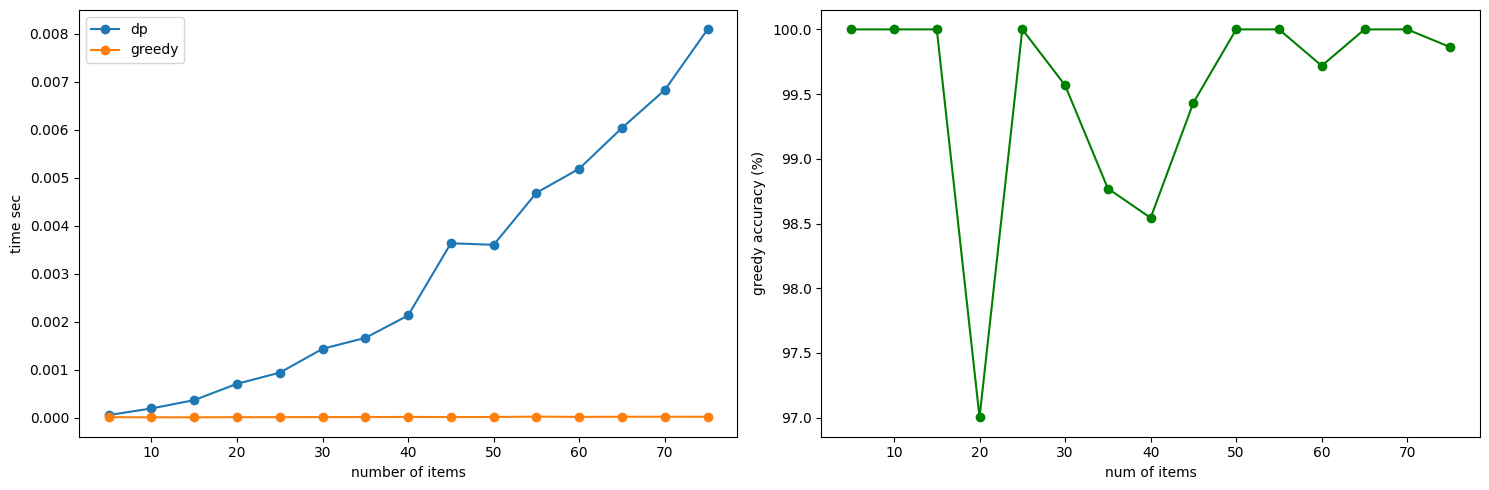

In [46]:
n_values = [len(case[1]) for case in test_cases]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.plot(n_values, dp_times, 'o-', label='dp')
ax1.plot(n_values, greedy_times, 'o-', label='greedy')
ax1.set_xlabel('number of items')
ax1.set_ylabel('time sec')
ax1.legend()

ax2.plot(n_values, accuracies, 'o-', color='green')
ax2.set_xlabel('num of items')
ax2.set_ylabel('greedy accuracy (%)')

plt.tight_layout()
plt.show()

In [47]:

avg_accuracy = sum(accuracies) / len(accuracies)
max_dp_time = max(dp_times)
max_greedy_time = max(greedy_times)
speedup_factor = max_dp_time / max_greedy_time

print(f"avg accuracy of greedy: {avg_accuracy:.2f}%")
print(f"max DP time: {max_dp_time:.6f} seconds")
print(f"max greedy time: {max_greedy_time:.6f} seconds")

avg accuracy of greedy: 99.53%
max DP time: 0.008090 seconds
max greedy time: 0.000018 seconds
